In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow
from keras.models import Sequential # To initialise the nn as a sequence of layers
from keras.layers import Convolution2D # To make the convolution layer for 2D images
from keras.layers import MaxPooling2D # 
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.callbacks import CSVLogger
from tensorflow.keras.optimizers import RMSprop
from keras.layers import BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow import data
from keras.models import load_model
from keras.callbacks import ModelCheckpoint
from tensorflow import repeat as rp

csv=CSVLogger("2_adam.log")
#filepath="weights-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
#checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')


# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Convolution2D(32,(2,2),input_shape = (224,224,1), activation = 'relu',strides=2,name='convo1'))
classifier.add(Convolution2D(64,(3,3), activation = 'relu',name='convo2'))
# Step 1 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))

# Step 2 - Convolution
classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo3'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2,2)))
# Step 3 - Convolution
#classifier.add(Convolution2D(64,(3,3),activation = 'relu',name='convo4'))
# Step 3 - Pooling
#classifier.add(MaxPooling2D(pool_size = (2,2)))
#Step 4 - Flattening

classifier.add(Flatten())

classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(1024, activation = 'relu'))

'''classifier.add(BatchNormalization())
classifier.add(Dropout((0.5)))
classifier.add(Dense(512, activation = 'relu'))
'''

classifier.add(BatchNormalization())
classifier.add(Dropout((0.4)))
classifier.add(Dense(10, activation = 'softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 convo1 (Conv2D)             (None, 112, 112, 32)      160       
                                                                 
 convo2 (Conv2D)             (None, 110, 110, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 55, 55, 64)       0         
 )                                                               
                                                                 
 convo3 (Conv2D)             (None, 53, 53, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 26, 26, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 43264)             0

In [2]:
import matplotlib.pyplot as plt
adam = Adam(epsilon = 0.01)
classifier.compile(optimizer = adam, loss = 'categorical_crossentropy', metrics = ['accuracy'])

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

curr_path = os.getcwd()
basefolder = os.path.dirname(curr_path)
train_folder = os.path.join(basefolder, "DatasetITA/Train")
test_folder = os.path.join(basefolder, "DatasetITA/Test")
train_set=tensorflow.data
train_set = train_datagen.flow_from_directory(train_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')


test_set = test_datagen.flow_from_directory(test_folder,target_size=(224, 224),batch_size=32,class_mode='categorical',color_mode='grayscale')
classifier.metrics_names




Found 608 images belonging to 10 classes.
Found 69 images belonging to 10 classes.


[]

In [3]:
#nb_conda_kernels

In [4]:
history = classifier.fit(train_set,steps_per_epoch=train_set.n/32,epochs=50,validation_data=test_set,validation_steps=test_set.n/32,callbacks=[csv],verbose=1)

Epoch 1/50
19/19 [==============================] - 13s 660ms/step - loss: 3.2644 - accuracy: 0.0872 - val_loss: 2.3051 - val_accuracy: 0.0870
Epoch 2/50
19/19 [==============================] - 12s 634ms/step - loss: 2.5669 - accuracy: 0.1859 - val_loss: 2.3183 - val_accuracy: 0.0725
Epoch 3/50
19/19 [==============================] - 12s 638ms/step - loss: 2.4020 - accuracy: 0.2533 - val_loss: 2.2784 - val_accuracy: 0.2174
Epoch 4/50
19/19 [==============================] - 12s 639ms/step - loss: 1.8463 - accuracy: 0.4112 - val_loss: 2.2838 - val_accuracy: 0.1159
Epoch 5/50
19/19 [==============================] - 12s 636ms/step - loss: 1.4361 - accuracy: 0.5428 - val_loss: 2.2227 - val_accuracy: 0.2174
Epoch 6/50
19/19 [==============================] - 12s 638ms/step - loss: 0.9941 - accuracy: 0.6809 - val_loss: 2.2215 - val_accuracy: 0.2464
Epoch 7/50
19/19 [==============================] - 12s 644ms/step - loss: 0.7655 - accuracy: 0.7451 - val_loss: 2.1923 - val_accuracy: 0.1739

In [5]:
classifier.save('2_adam_prova.h5')


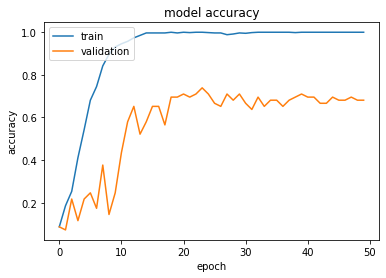

In [6]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy']) #validation
plt.plot(history.history['val_accuracy']) #train
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()